In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from iminuit import Minuit

In [2]:
stringa = 'C:/Users/kid/SynologyDrive/Lab2023/KIDs/QTLab2324/IRdetection/Instruments/Test_data/Resonance02.txt'
dati = list(np.genfromtxt(stringa))

In [3]:
f = []
Q = []
I = []
for i in dati:
    f.append(i[0])
    I.append(i[1])
    Q.append(i[2])
f = np.array(f)/1e9
Q = np.array(Q)
I = np.array(I)

S21 = np.sqrt(I**2 + Q**2)

In [5]:
'''fattore moltiplicativo (in genere1), Qt, Qi, rotazione, f di risonanza, termine fondo lineare, fondoquadratico, fondo cubico'''
fmin = float(f[S21==min(S21)])
m = (S21[-1]-S21[0])/(f[-1]-f[0])   #m e q mediati sul primo e ultimo punto
q = -m*f[0]+S21[0]
params = [1e3, 1e4, 1.5, fmin, -m, q]   #initial guesses per il fit
print('fmin: ', fmin)
print('m   : ', m)
print('q   : ', q)

fmin:  5.7367842
m   :  -2.3792818472495525
q   :  13.775284185641144


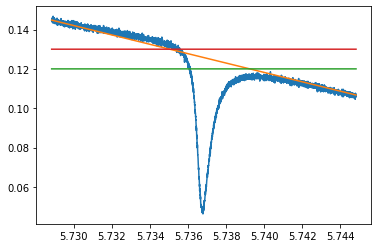

In [6]:
plt.plot(f,S21, label='|S21|')
plt.plot(f, m*f+q)
plt.plot(f, 0.12*f/f)       # limiti dx e sx per vedere dove ha più senso tagliare i dati
plt.plot(f, 0.13*f/f)

In [6]:
x1 = (0.12-q)/m     #intersezione rette verde e arancio 
x2 = (0.13-q)/m     #intersezione rette rossa e arancio

In [7]:
#questo pezzo di codice serve a tagliare i dati togliendo la risonanza, per fare il fit con la retta (o polinomio di terzo grado)
s21n = []
fn = []
for i in range(len(f)):
    if (f[i]<x2) or (f[i]>x1):
        fn.append(f[i])
        s21n.append(S21[i])
    

In [8]:
def retta (x,m,q):
    return m*x+q

In [10]:
popt, _ = curve_fit(retta, fn,s21n)
a, b = popt     # m e q

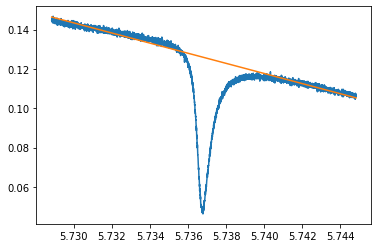

In [14]:
plt.plot(f,S21)         #fit baseline con la "vera" retta
plt.plot(f, a*f+b)

In [11]:
'''fattore moltiplicativo (in genere1), Qt, Qi, rotazione, f di risonanza, termine fondo lineare, quadratico, cubico'''

def resonance(x, Q, Q_c, phi0, fmin, a1, a2):       #a1 e a2 sono i q e m della retta
    f = (x-fmin)/fmin
    num = pow(Q,2) - 2*np.cos(phi0)*Q*Q_c - 4*np.sin(phi0)*pow(Q,2)*Q_c*f
    den = (1 + pow((2*Q*f),2))*(Q_c**2)
    return (a1 + a2*f)*np.sqrt(1 + num/den)

In [52]:
def resonance(x, Q, Q_c, phi0):
    fmin = 5.7367842
    a1 = -2.56824713
    a2 = 14.85941395
    f = (x-fmin)/fmin
    num = pow(Q,2) - 2*np.cos(phi0)*Q*Q_c - 4*np.sin(phi0)*pow(Q,2)*Q_c*f
    den = (1 + pow((2*Q*f),2))*(Q_c**2)
    return (a1 + a2*f)*np.sqrt(1 + num/den)

def myres(x, Q, Q_c, phi, f_0):
    return abs(1-(Q/Q_c) * (np.exp(1j*phi))/(1+2j*Q*(x-f_0)/f_0))

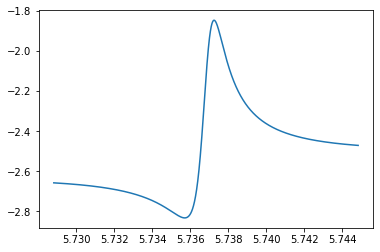

In [56]:
plt.plot(f, resonance(f, 4050, 10600, 1))

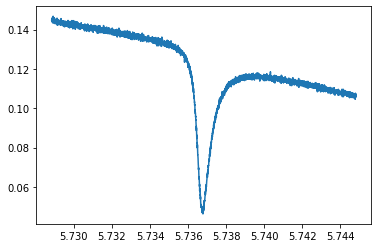

In [46]:
plt.plot(f, S21)

In [40]:
popt, _ = curve_fit(resonance, f, S21, maxfev = 10000000)

KeyboardInterrupt: 

In [30]:
a,b,c = popt

C:\Users\kid\AppData\Local\Temp\ipykernel_11532\255475053.py:8: RuntimeWarning: invalid value encountered in sqrt
  return (a1 + a2*f)*np.sqrt(1 + num/den)


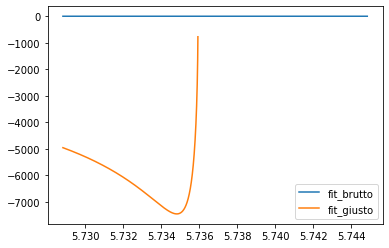

In [36]:
plt.plot(f, resonance(f,a, b, c), label = 'fit_brutto')
plt.plot(f, resonance(f, 4050, 10600, 1), label = 'fit_giusto')
plt.legend()